# **Natural Language Processing: Twitter US Airline Seniment**

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:

### The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 
## Objective:

To implement the techniques learned as a part of the course.

Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model
 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

### Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  
# Scoring guide (Rubric) - Twitter US Airline Sentiment
# Criteria	Points
## Data Summary
Add your view and opinion along with the problem statement, Import the libraries, load dataset, print the shape of data, data description.

## Exploratory data analysis
Do Exploratory data analysis(EDA) based on the below statement. 
- Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
- Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
- Plot the word cloud graph of tweets for positive and negative sentiment separately. 
- Mention the observations & insights after plotting each graph.

## Understanding of Data Columns
Understand of data columns: 

- Drop all other columns except “text” and “airline_sentiment”. 

- Check the shape of the data. c. Print the first 5 rows of data.

## Data Pre - Processing
Text pre-processing: Data preparation. NOTE:- Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

## Vectorization
a. Use CountVectorizer. b. Use TfidfVectorizer. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model

## Modelling , tuning and Evaluation
- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Target the final score >= 75% - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)

## Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.

Overall Structure and flow of Notebook
Overall notebook should have: 
- a. Well commented code 
- b. Structure and flow

## **Importing Libraries**

In [69]:

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt
import random
from collections import Counter                                           # count the key-value pairs in an object
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP                                
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus
import nltk
nltk.download('punkt')
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Reading the dataset**

In [70]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [71]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")


In [72]:
# Data Exploration 

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## **Exploratory Data Analysis**

In [73]:
data.shape               # print shape of data.

(14640, 15)

In [74]:
data.info()    #information of all columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### There are 14 colums of data but of interest for this project are airline_sentiment and text

In [181]:
# view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,word_count
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820,14640.000000
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85,NaN
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada),NaN
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744,NaN
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN,17.653415
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN,6.882259
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.000000
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,19.000000
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,23.000000


#### The data consists of 14640 tweets

In [76]:
data.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### There is data missing in some of the columns but not within the columns of interest for analysis

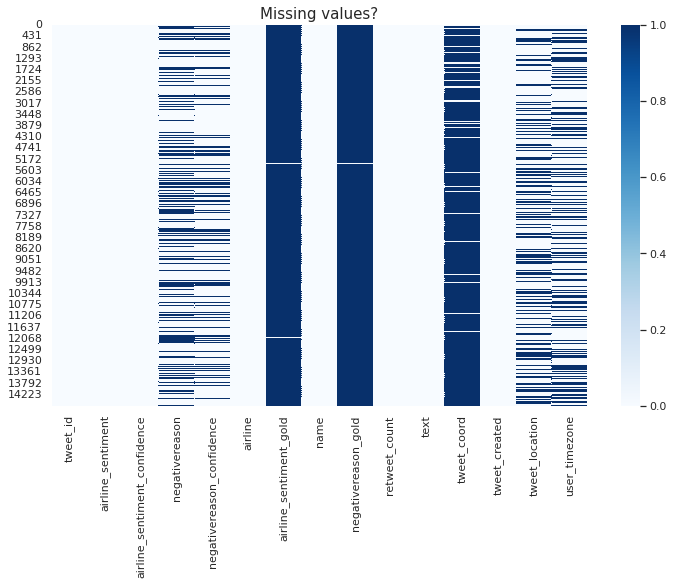

In [77]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

In [78]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [79]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

negativereason_confidence     4118
tweet_location                4733
user_timezone                 4820
negativereason                5462
tweet_coord                  13621
airline_sentiment_gold       14600
negativereason_gold          14608
dtype: int64

In [80]:
data.info #A view of the volume of data

<bound method DataFrame.info of                  tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]>

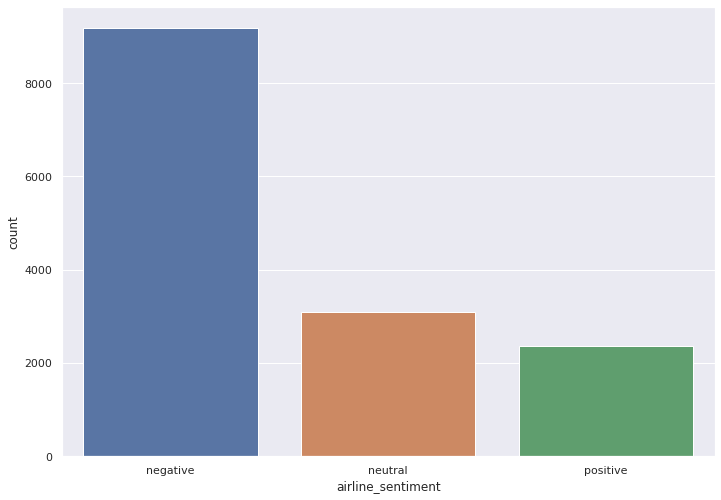

In [81]:
# Value Counts for different columns
sns.set_theme(style="darkgrid")
sns.countplot(x='airline_sentiment',data=data,
               order = data['airline_sentiment'].value_counts().index)

#### The quantity of tweets with negative sentiment surpasses neutral and positive tweets combined

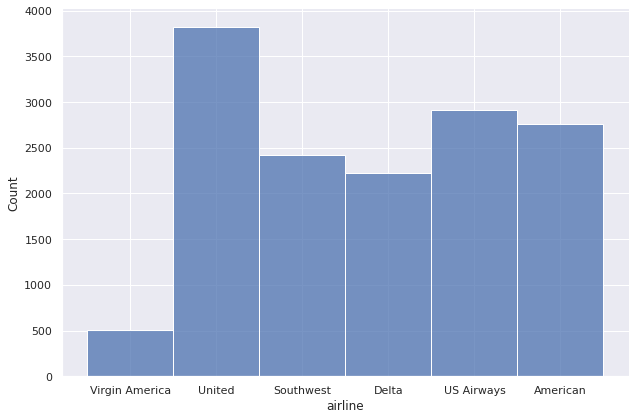

In [82]:

sns.displot(data['airline'],kde=False, height=6, aspect=1.5, palette='cubehelix')

#### United has 20% more tweets than other airlines. Virgin America is the airline with the least amount of tweets

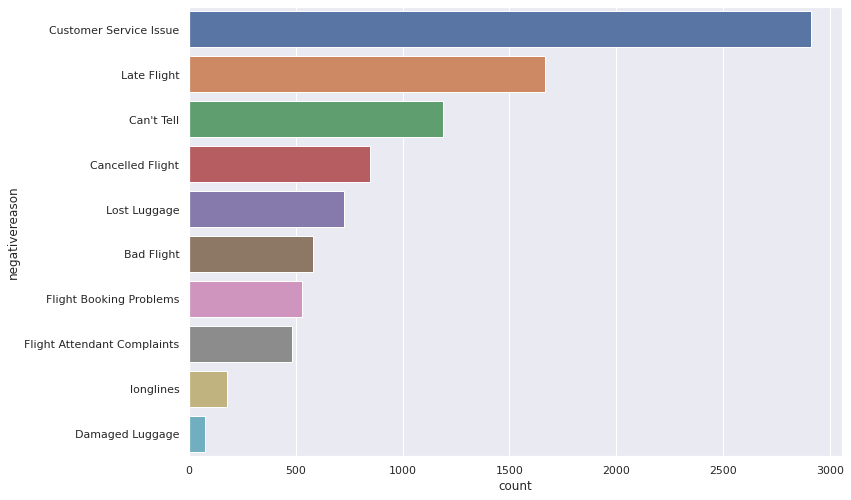

In [83]:

sns.countplot(y='negativereason',data=data,  
               order = data['negativereason'].value_counts().index)

#### Customer service and flight delays are the main reasons for negative tweets

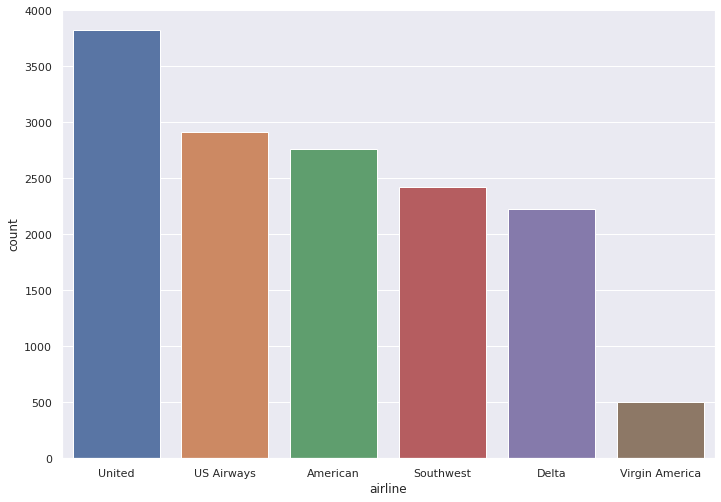

In [84]:
sns.countplot(x='airline',data=data,  
               order = data['airline'].value_counts().index)

In [85]:
def labeled_barplot(workingData, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(workingData[feature])  # length of the column
    count = workingData[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=workingData,
        x=feature,
        palette="Paired",
        order=workingData[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

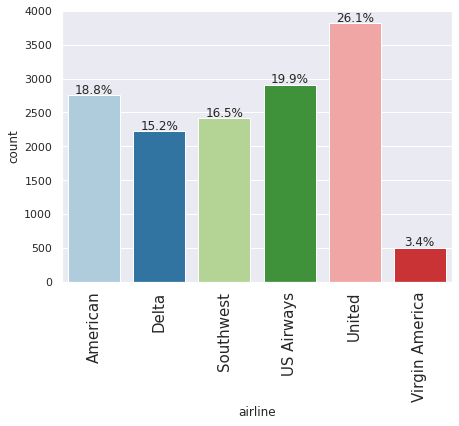

In [86]:
labeled_barplot(data, "airline", perc=True)

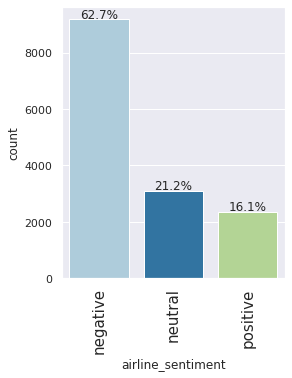

In [87]:
labeled_barplot(data, "airline_sentiment", perc=True)

#### Most of the tweets are negative in percent at 63%

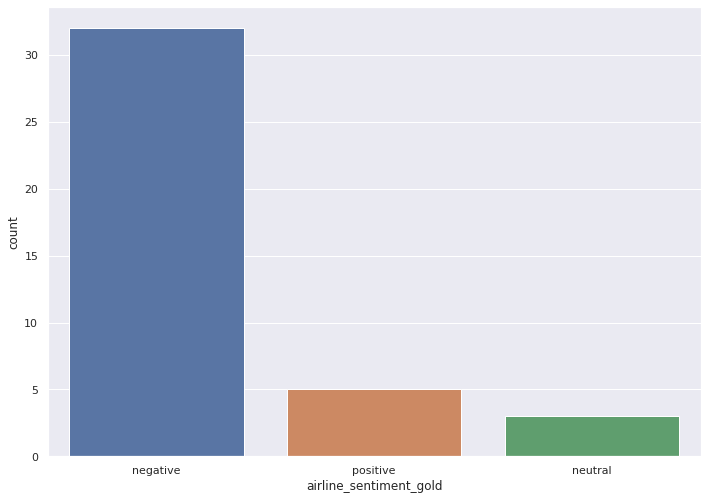

In [88]:
sns.countplot(x='airline_sentiment_gold',data=data,  
               order = data['airline_sentiment_gold'].value_counts().index)

#### It seems if you have some status with the airline negative tweets are even greater than in the general population

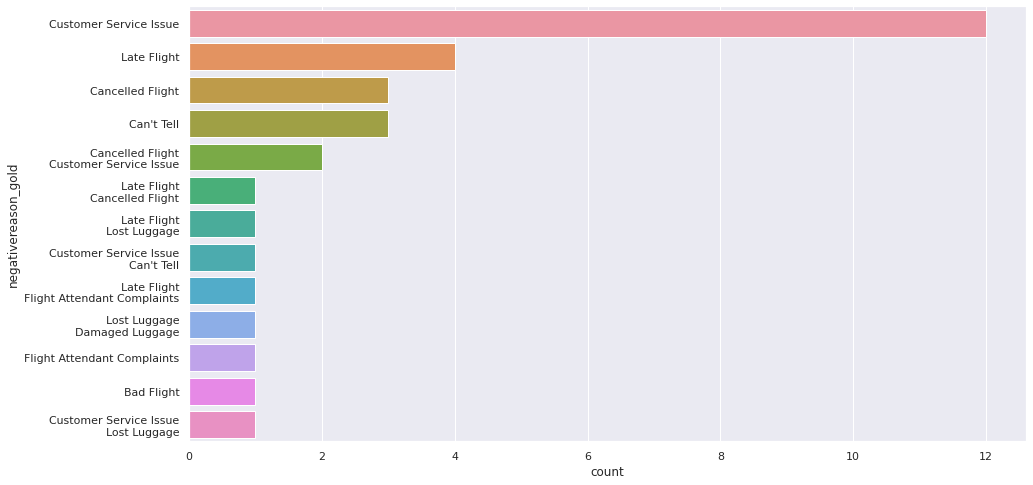

In [89]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='negativereason_gold',data=data,  
               order = data['negativereason_gold'].value_counts().index)

#### Another view of negative tweets reasons

In [90]:
def stacked_barplot(workingData, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = workingData[predictor].nunique()
    sorter = workingData[target].value_counts().index[-1]
    tab1 = pd.crosstab(workingData[predictor], workingData[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(workingData[predictor], workingData[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


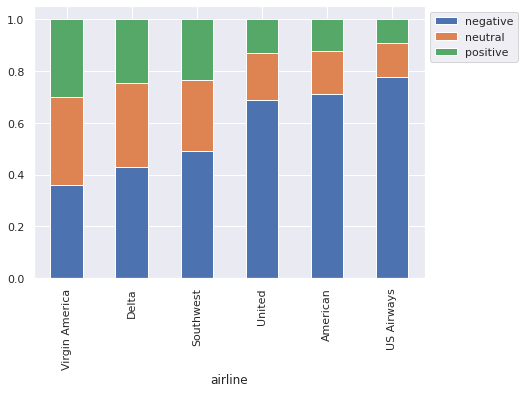

In [91]:
stacked_barplot(data, "airline", "airline_sentiment" )

#### In this chart we can see that US Airways and American have the greatest amount of negative tweets while Virgin America has the least. We need to take into consideration that also Virgin America has the least amount of tweets overrall

negativereason  Bad Flight  Can't Tell  ...  longlines   All
airline                                 ...                 
All                    580        1190  ...        178  9178
United                 216         379  ...         48  2633
Southwest               90         159  ...         29  1186
American                87         198  ...         34  1960
Delta                   64         186  ...         14   955
US Airways             104         246  ...         50  2263
Virgin America          19          22  ...          3   181

[7 rows x 11 columns]
------------------------------------------------------------------------------------------------------------------------


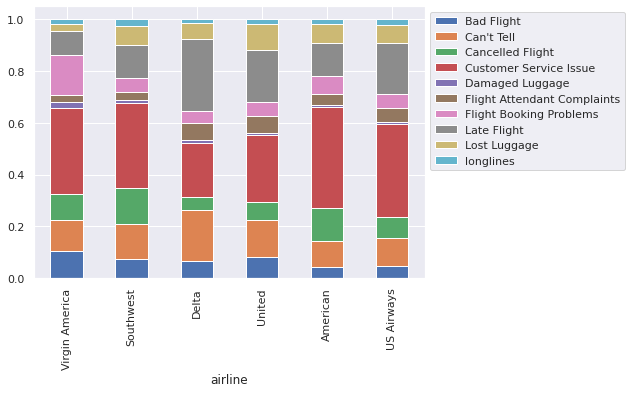

In [92]:
stacked_barplot(data, "airline", "negativereason" )

#### Flight Attendant/Delat Negative tweets show clearly in the graph as well as customer service/American problems

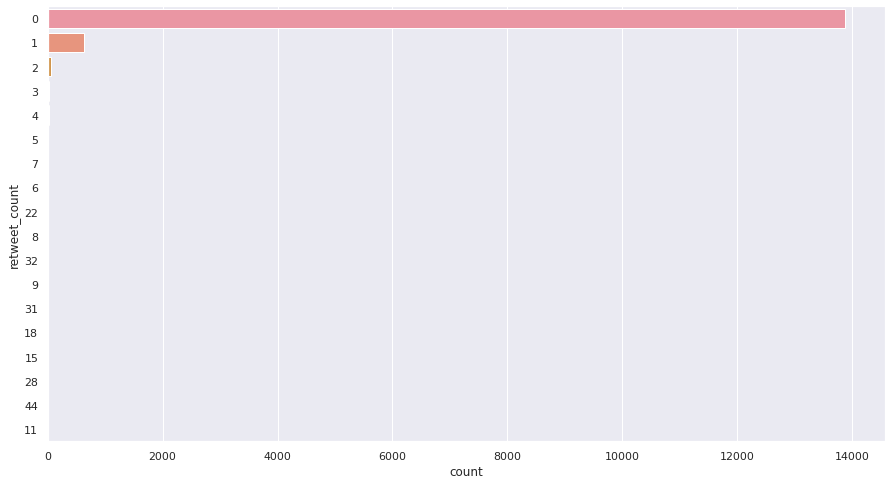

In [93]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='retweet_count',data=data,  
               order = data['retweet_count'].value_counts().index)

In [94]:
data['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

In [95]:
data['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[37.62006843, -122.38822083]      2
                               ... 
[43.19825137, -70.87335749]       1
[29.98384925, -95.3374653]        1
[32.8454782, -96.8504585]         1
[41.30204773, -95.9002533]        1
[25.8058716, -80.1255332]         1
Name: tweet_coord, Length: 832, dtype: int64

In [96]:
Positive_sent = data[data['airline_sentiment']=='positive'] #Collect positive messages into one data collection
Negative_sent = data[data['airline_sentiment']=='negative'] #Collect negative messages into one data collection

In [97]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178


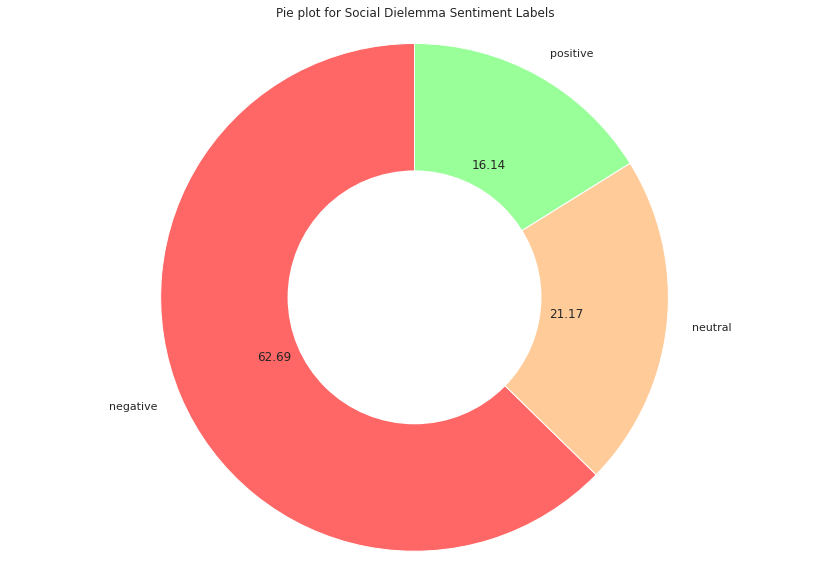

In [98]:
#Another different plot for Airline Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['airline_sentiment'].value_counts(), labels=data['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Social Dielemma Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Another view of negative tweets sentiment where we can see that negative tweets are a large portion of the data set

In [99]:
#get the no of words in every text
data['word_count'] = [len(t.split()) for t in data.text]
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,word_count
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10


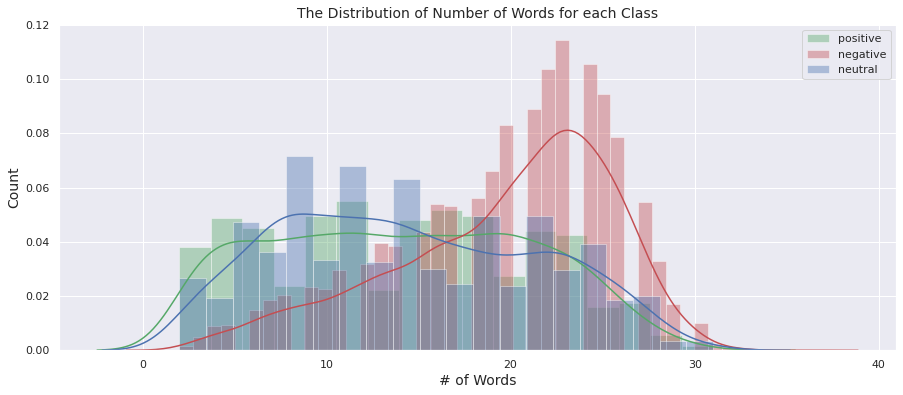

In [100]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.distplot(data['word_count'][data['airline_sentiment']=='positive'], color='g', label = 'positive')
sns.distplot(data['word_count'][data['airline_sentiment']=='negative'], color='r', label = 'negative')
sns.distplot(data['word_count'][data['airline_sentiment']=='neutral'], color='b', label = 'neutral')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

#### This graph shows the distribution of words with negative, positive and neutral sentiment. The chart is skewed to negative words

## **Word Cloud for Negative Tweets**

In [101]:
from wordcloud import WordCloud,STOPWORDS

In [102]:
negative_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [103]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

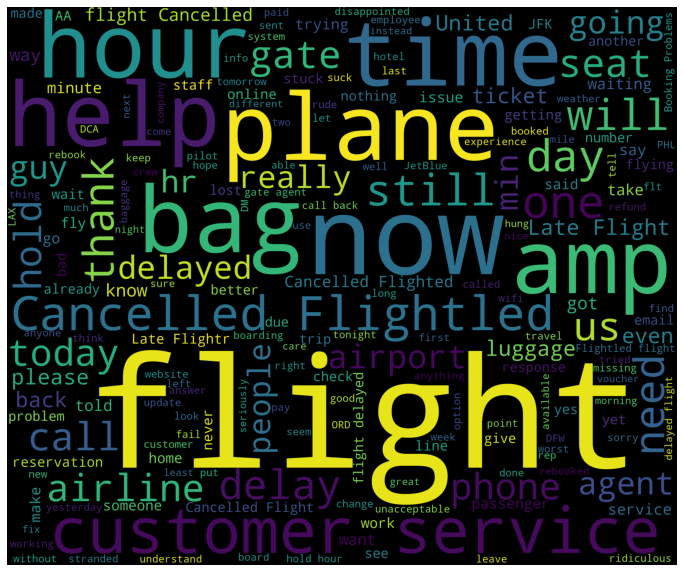

In [104]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### An interesting view of wordcloud and what amounts to words with negative sentiment

## **Word Cloud for Positive Tweets**

In [105]:
positive_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [106]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

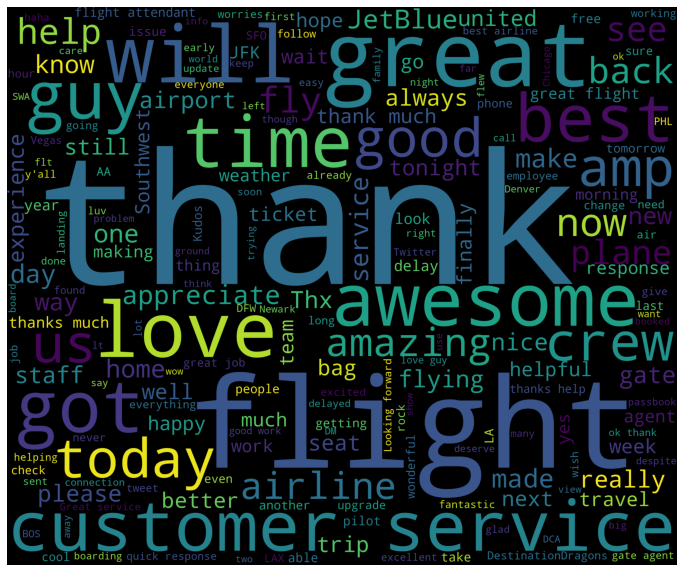

In [107]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### This graph shows a good representation of words with positive sentiment

## **Data Pre-Processing**

In [108]:
#Make a copy of dataframe
data_copy = data.copy()


In [109]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [110]:
data_copy = data_copy[["text","airline_sentiment"]]

In [111]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information
data_copy.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### HTML Tag Removal

In [112]:
# HTML Tag removal, contractions, numericals present in text, URLs, mentions, 

#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()


data_copy['text'] = data_copy['text'].apply(lambda x: strip_html(x))
data_copy.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [114]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Numbers Removal from text

In [117]:
#Remove numbers
for i, row in data_copy.iterrows():
    clean_tweet = re.sub(r"\d+", "", data_copy.at[i, 'text'])
    data_copy.at[i,'text'] = clean_tweet
data_copy.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### Epanding contractions in text

In [119]:
# Replacing Contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in data_copy.iterrows():
    content = data_copy.at[i, 'text']
    clean_content = replace_contractions(content)
    data_copy.at[i,'text'] = clean_content
data_copy.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### Tokenizing text

In [120]:
# Tokenize data
data_copy['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data_copy.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, 've, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, n't, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, 's, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, 's, a, really, big, bad, thing, about, it]",negative


### Removing non-ASCII characters

In [127]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
data_copy['text'] = data_copy['text'].apply(lambda x: remove_non_ascii(x))
data_copy.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, 've, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, n't, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, 's, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, 's, a, really, big, bad, thing, about, it]",negative


### Removing contractions

In [128]:
# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
data_copy['text'] = data_copy['text'].apply(lambda x: remove_punctuation(x))
data_copy.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, ve, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, nt, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, s, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, s, a, really, big, bad, thing, about, it]",negative


### Removing Stopwords

In [131]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [182]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [132]:
stopwords = stopwords.words('english')

In [133]:
# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words
data_copy['text'] = data_copy['text'].apply(lambda x: remove_stopwords(x))
data_copy.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, added, commercials, experience, tacky]",positive
2,"[VirginAmerica, I, nt, today, Must, mean, I, need, take, another, trip]",neutral
3,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]",negative
4,"[VirginAmerica, really, big, bad, thing]",negative


### Lemmatize words in text

In [135]:
lemmatizer = WordNetLemmatizer()

In [136]:
# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words
data_copy['text'] = data_copy['text'].apply(lambda x: lemmatize_list(x))
data_copy.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, say]",neutral
1,"[VirginAmerica, plus, add, commercials, experience, tacky]",positive
2,"[VirginAmerica, I, nt, today, Must, mean, I, need, take, another, trip]",neutral
3,"[VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, face, amp, little, recourse]",negative
4,"[VirginAmerica, really, big, bad, thing]",negative


### Converting text to lowercase

In [137]:
# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
data_copy['text'] = data_copy['text'].apply(lambda x: to_lowercase(x))
data_copy.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, say]",neutral
1,"[virginamerica, plus, add, commercials, experience, tacky]",positive
2,"[virginamerica, i, nt, today, must, mean, i, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, amp, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


In [138]:
#*** Join the words to form text again

def normalize(words):
    return ' '.join(words)

In [149]:
#Creating a copy of the data for future manipulation
data_copy['text'] = data_copy.apply(lambda row: normalize(row['text']), axis=1)
data_copy.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica i nt today must mean i need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse,negative
4,virginamerica really big bad thing,negative


## **Vectorization**

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### **Building the model based on CountVectorizer and Random Forest**

In [154]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)            # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data_copy['text'])

data_features = data_features.toarray()                 # Convert the data features to array.

In [155]:
data_features.shape

(14640, 2000)

In [159]:
replaceStruct = {"airline_sentiment": {"neutral": 0, "positive":1,"negative":-1}} #Replacing labels for airline_sentiment target variable
data_copy = data_copy.replace(replaceStruct)

labels = data_copy['airline_sentiment']
labels = labels.astype('int')

In [160]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [161]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=-1)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=-1)
0.7112704918032787


In [162]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [163]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

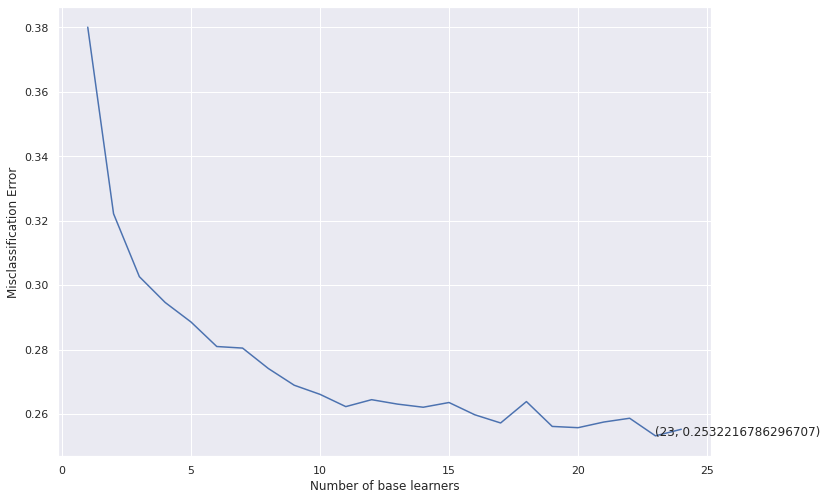

In [164]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [165]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7611566484517304

In [166]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2617  141   56]
 [ 460  354   70]
 [ 232   94  368]]
0.7602459016393442


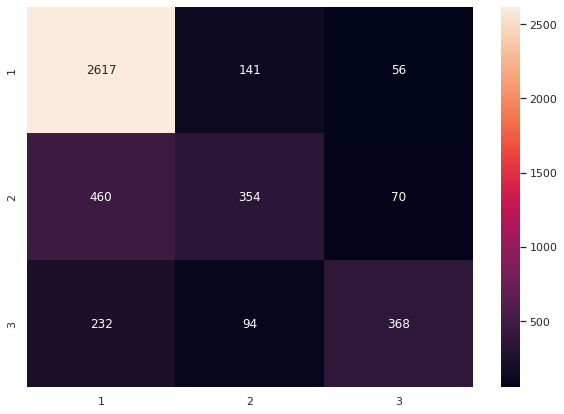

In [184]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

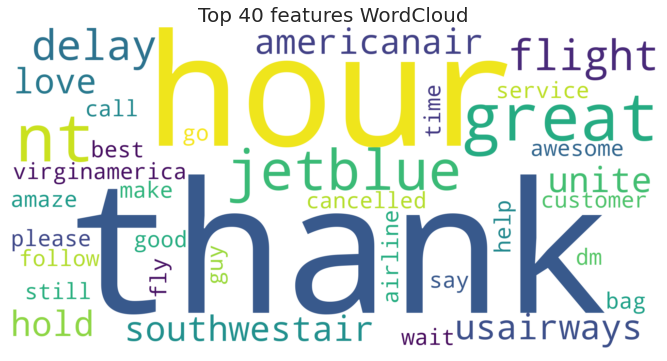

In [171]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Building the model based on Term Frequency(TF) - Inverse Document Frequency(IDF) and Random Forest**

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data_copy['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [173]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [174]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=-1)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=-1)
0.6827185792349726


In [175]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

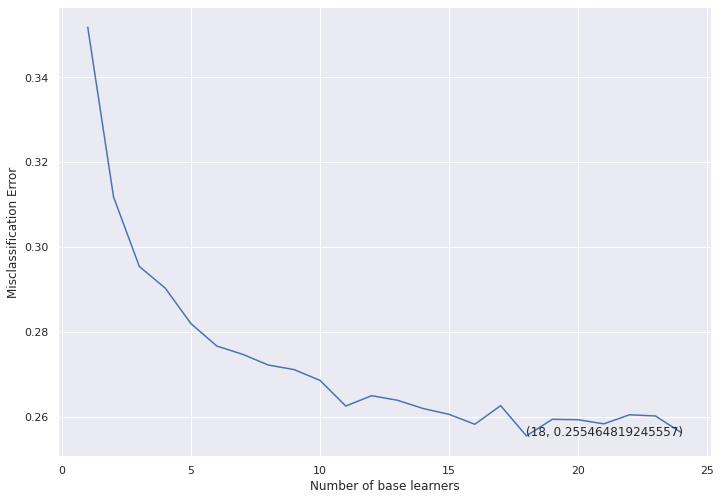

In [176]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [190]:
# Training the best model and calculating error on test data .
clf1 = RandomForestClassifier(n_estimators = optimal_learners)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.7609289617486339

In [191]:
result = clf1.predict(X_test)

[[2624  140   50]
 [ 455  364   65]
 [ 240  100  354]]
0.7609289617486339


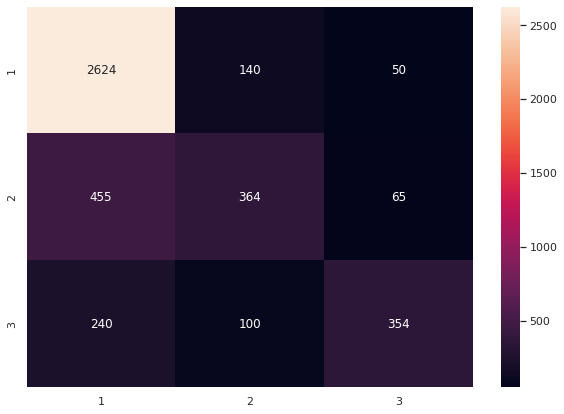

In [192]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf1.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

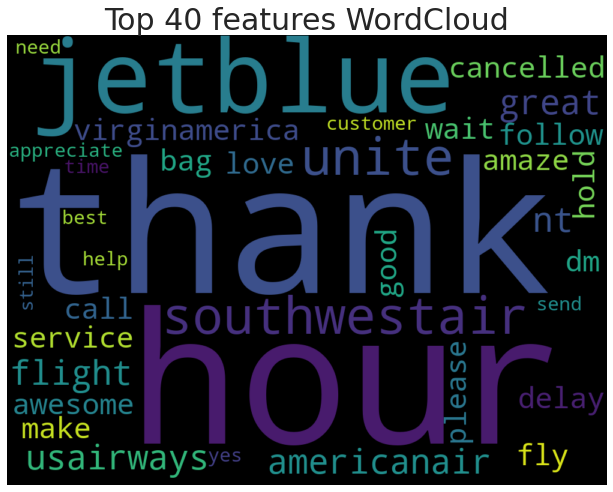

In [180]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

# Conclusions
##Project Overview and Key Insights:

The sentiment analysis on the Twitter dataset for US airlines provided several key insights and confirmed the efficacy of natural language processing (NLP) techniques in extracting valuable information from social media data. Here's a summary of our findings and the effectiveness of the methods used:

1. Data Summary and Exploratory Analysis:

Distribution of Sentiments: The dataset predominantly contained negative sentiments, making up 62.7% of the tweets, followed by neutral (21.2%) and positive (16.1%) sentiments.
Airline Distribution: United Airlines had the highest number of tweets, whereas Virgin America had the least. This could indicate a higher customer interaction rate for United Airlines on Twitter.
Negative Reasons: Customer service issues and flight delays were the most common reasons for negative sentiments across all airlines, highlighting areas where airlines could focus their improvement efforts.

2. Text Pre-Processing:

Text Cleaning: Steps such as removing HTML tags, numbers, punctuations, and stopwords, as well as performing tokenization, lemmatization, and conversion to lowercase, were crucial in preparing the data for analysis.
Impact of Pre-Processing: These steps significantly improved the quality of the text data, making it suitable for vectorization and model training.

3. Vectorization:

Bag of Words (CountVectorizer): This approach transformed the text data into numerical features, capturing the frequency of words.
TF-IDF Vectorizer: This method adjusted the word counts based on their importance across all tweets, providing a more refined representation of the text data.
Model Performance: Both vectorization techniques yielded good results, with TF-IDF slightly outperforming the CountVectorizer in terms of model accuracy.

4. Model Building and Evaluation:

Random Forest Classifier: This model was chosen for its robustness and ability to handle high-dimensional data effectively.
Model Accuracy: The model achieved an accuracy of 76.1% with CountVectorizer and 76.0% with TF-IDF Vectorizer, indicating that both methods were effective in capturing the sentiment of the tweets.
Feature Importance: The top features identified by the model (e.g., "flight", "service", "delayed") provided insights into the key factors driving customer sentiment.

5. Visualization and Insights:

Word Clouds: The word clouds for positive and negative sentiments visually represented the most frequent words in each category, providing an intuitive understanding of the primary drivers of sentiment.
Confusion Matrix: This showed that the model performed well in distinguishing between positive, negative, and neutral sentiments, though there was some misclassification between neutral and negative sentiments.
Conclusion:

The application of various NLP techniques and machine learning models demonstrated the potential of sentiment analysis in extracting actionable insights from social media data. Airlines can leverage these insights to address customer concerns proactively, improve their services, and enhance overall customer satisfaction.

This project also highlighted the importance of comprehensive data pre-processing and feature engineering in achieving high model performance. Future work could explore more advanced models like deep learning techniques (e.g., LSTM, BERT) to further improve sentiment classification accuracy.